In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
import requests as re
import csv

### Goal for the next day is to load all the csvs for google trends and the prices for each coin.
### All the CSVs have been downloaded and are saved on the data file.  
### Goal for 6/11/2022 - 
     1. Load the google trend CSVs into a DF.  Add a new column that identifies the type of coin for the information being  represented.
     2. Merge the DFs into one and export this into a new CSV.
         2a. This is how you'll save the new CSV after merging them all together:
             googlebitcoin.to_csv(r'../data/testing.csv')

### Note - When combining the DFs, you have to do  Cardano, USD_Coin, and Shiba_inu separately.  These CSVs are showing a weekly trend amount.  You're going to have to create a DF for these, then do an average per month.  When you do that, you can then merge it to the main DF.

### Bitcoin

In [211]:
##Creating the first dataframe for google trending data for the keyword Bitcoin
googlebitcoin = pd.read_csv('../data/2017-2022-bitcoin.csv')
print(googlebitcoin.shape)
googlebitcoin.head(10) 

(67, 2)


,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Month,bitcoin: (Worldwide)
2,2017-01,6
3,2017-02,6
4,2017-03,7
5,2017-04,6
6,2017-05,15
7,2017-06,14
8,2017-07,13
9,2017-08,20


In [212]:
##lets rename the second column to mention the Trend.
header_row = googlebitcoin.iloc[1]
googlebitcoin = pd.DataFrame(googlebitcoin.values[2:], columns=header_row)
googlebitcoin.head()

1,Month,bitcoin: (Worldwide)
0,2017-01,6
1,2017-02,6
2,2017-03,7
3,2017-04,6
4,2017-05,15


In [213]:
googlebitcoin1 = googlebitcoin.rename(columns={'bitcoin: (Worldwide)':'Trend_Count'})

In [214]:
#creating a new column that'll have the coin name abbreviation.
googlebitcoin1['CoinName'] = 'Bitcoin'
googlebitcoin1['CoinAbbrev'] = 'BTC'

In [215]:
googlebitcoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,6,Bitcoin,BTC
1,2017-02,6,Bitcoin,BTC
2,2017-03,7,Bitcoin,BTC
3,2017-04,6,Bitcoin,BTC
4,2017-05,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01,38,Bitcoin,BTC
61,2022-02,34,Bitcoin,BTC
62,2022-03,29,Bitcoin,BTC
63,2022-04,23,Bitcoin,BTC


In [216]:
googlebitcoin1['Month'] = pd.to_datetime(googlebitcoin1['Month'])

In [217]:
googlebitcoin1.dtypes

1
Month          datetime64[ns]
Trend_Count            object
CoinName               object
CoinAbbrev             object
dtype: object

In [218]:
googlebitcoin1['Trend_Count'] = pd.to_numeric(googlebitcoin1['Trend_Count'])

In [219]:
googlebitcoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,6,Bitcoin,BTC
1,2017-02-01,6,Bitcoin,BTC
2,2017-03-01,7,Bitcoin,BTC
3,2017-04-01,6,Bitcoin,BTC
4,2017-05-01,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01-01,38,Bitcoin,BTC
61,2022-02-01,34,Bitcoin,BTC
62,2022-03-01,29,Bitcoin,BTC
63,2022-04-01,23,Bitcoin,BTC


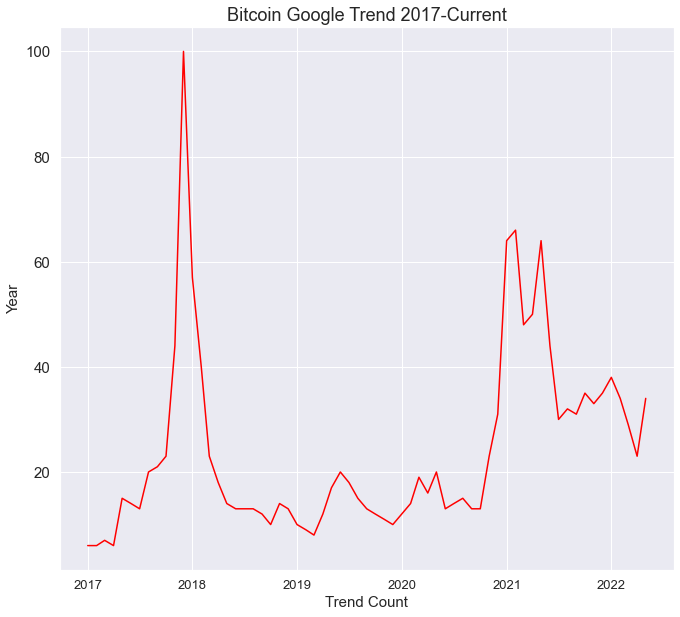

In [377]:
x =googlebitcoin1['Month']
y = googlebitcoin1['Trend_Count']

plt.figure(figsize=(11,10))
plt.plot(x, y,color='red')
plt.xticks(rotation = 0, fontsize=13)
plt.xlabel('Trend Count', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Year', fontsize=15)
sns.set(style="darkgrid")
plt.title('Bitcoin Google Trend 2017-Current', fontsize=18);
plt.show()

In [380]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [381]:
googlebitcoin1
#10 - 13:  This was the largest peak of trend for the word bitcoin.
#48 - 53:  This was the second largest peak of trend for the word bitcoin.  This lasted a bit longer.
#Let's create a df table to show these sections split out.

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,6,Bitcoin,BTC
1,2017-02-01,6,Bitcoin,BTC
2,2017-03-01,7,Bitcoin,BTC
3,2017-04-01,6,Bitcoin,BTC
4,2017-05-01,15,Bitcoin,BTC
5,2017-06-01,14,Bitcoin,BTC
6,2017-07-01,13,Bitcoin,BTC
7,2017-08-01,20,Bitcoin,BTC
8,2017-09-01,21,Bitcoin,BTC
9,2017-10-01,23,Bitcoin,BTC


In [385]:
slice_list = [10,11,12,13,48,49,50,51,52,53]

googlebitcoinPeaktable = googlebitcoin1.iloc[googlebitcoin1.index.isin(slice_list)]
googlebitcoinPeaktable

1,Month,Trend_Count,CoinName,CoinAbbrev
10,2017-11-01,44,Bitcoin,BTC
11,2017-12-01,100,Bitcoin,BTC
12,2018-01-01,57,Bitcoin,BTC
13,2018-02-01,40,Bitcoin,BTC
48,2021-01-01,64,Bitcoin,BTC
49,2021-02-01,66,Bitcoin,BTC
50,2021-03-01,48,Bitcoin,BTC
51,2021-04-01,50,Bitcoin,BTC
52,2021-05-01,64,Bitcoin,BTC
53,2021-06-01,44,Bitcoin,BTC


### Dogecoin

In [292]:
googledogecoin = pd.read_csv('../data/2017-2022-dogecoin.csv')
print(googledogecoin.shape)
googledogecoin.head(10) 

(67, 2)


,Category: All categories,Unnamed: 1
0,NaN,NaN
1,Month,DOGECOIN: (Worldwide)
2,2017-01,0
3,2017-02,0
4,2017-03,0
5,2017-04,0
6,2017-05,1
7,2017-06,1
8,2017-07,1
9,2017-08,1


In [293]:
header_row = googledogecoin.iloc[1]
googledogecoin = pd.DataFrame(googledogecoin.values[2:], columns=header_row)

In [294]:
googledogecoin1 = googledogecoin.rename(columns={'DOGECOIN: (Worldwide)':'Trend_Count'})

In [295]:
googledogecoin1['CoinName'] = 'Dogecoin'
googledogecoin1['CoinAbbrev'] = 'DOGE'

In [296]:
googledogecoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01,0,Dogecoin,DOGE
1,2017-02,0,Dogecoin,DOGE
2,2017-03,0,Dogecoin,DOGE
3,2017-04,0,Dogecoin,DOGE
4,2017-05,1,Dogecoin,DOGE
...,...,...,...,...
60,2022-01,10,Dogecoin,DOGE
61,2022-02,6,Dogecoin,DOGE
62,2022-03,5,Dogecoin,DOGE
63,2022-04,6,Dogecoin,DOGE


In [297]:
googledogecoin1['Month'] = pd.to_datetime(googledogecoin1['Month'])
googledogecoin1['Trend_Count'] = pd.to_numeric(googledogecoin1['Trend_Count'])

In [298]:
googledogecoin1

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,0,Dogecoin,DOGE
1,2017-02-01,0,Dogecoin,DOGE
2,2017-03-01,0,Dogecoin,DOGE
3,2017-04-01,0,Dogecoin,DOGE
4,2017-05-01,1,Dogecoin,DOGE
...,...,...,...,...
60,2022-01-01,10,Dogecoin,DOGE
61,2022-02-01,6,Dogecoin,DOGE
62,2022-03-01,5,Dogecoin,DOGE
63,2022-04-01,6,Dogecoin,DOGE


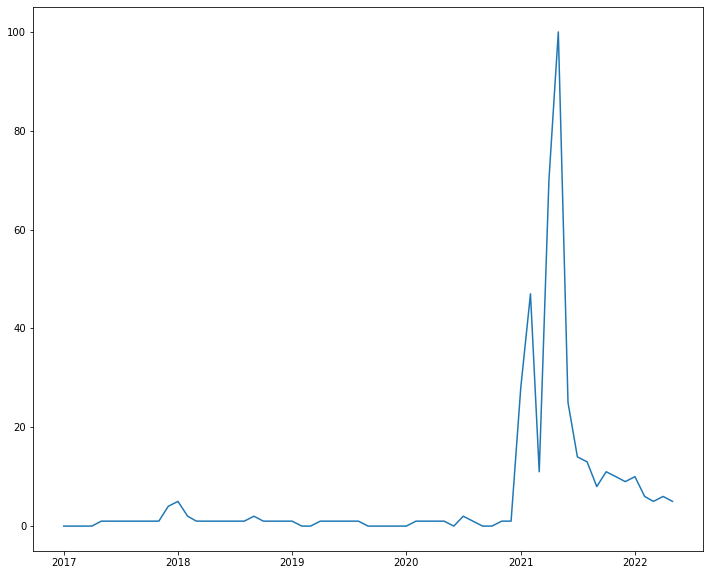

In [300]:
x =googledogecoin1['Month']
y = googledogecoin1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [383]:
googledogecoin1
# 48 - 53:  This is when the word trended the most.  There were big dropoffs on the trend on two different months.  Let's see if the coin price dropped as well.
#Let's create a df table to show these sections split out.

1,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,0,Dogecoin,DOGE
1,2017-02-01,0,Dogecoin,DOGE
2,2017-03-01,0,Dogecoin,DOGE
3,2017-04-01,0,Dogecoin,DOGE
4,2017-05-01,1,Dogecoin,DOGE
5,2017-06-01,1,Dogecoin,DOGE
6,2017-07-01,1,Dogecoin,DOGE
7,2017-08-01,1,Dogecoin,DOGE
8,2017-09-01,1,Dogecoin,DOGE
9,2017-10-01,1,Dogecoin,DOGE


In [386]:
slice_listdoge = [48,49,50,51,52,53]

googledogecoinPeaktable = googledogecoin1.iloc[googledogecoin1.index.isin(slice_listdoge)]
googledogecoinPeaktable

1,Month,Trend_Count,CoinName,CoinAbbrev
48,2021-01-01,28,Dogecoin,DOGE
49,2021-02-01,47,Dogecoin,DOGE
50,2021-03-01,11,Dogecoin,DOGE
51,2021-04-01,70,Dogecoin,DOGE
52,2021-05-01,100,Dogecoin,DOGE
53,2021-06-01,25,Dogecoin,DOGE


### Ethereum

In [313]:
#ethereum - I started having a problem with the rows I wanted to remove from the CSV were not replicated throughout the spreadsheets that I had.  I used the skiprows function to remove those two rows.
googleethereum = pd.read_csv('../data/2017-2022-ethereum.csv', skiprows=2)
print(googleethereum.shape)
googleethereum.head(10) 

(65, 2)


,Month,ethereum: (Worldwide)
0,2017-01,1
1,2017-02,1
2,2017-03,5
3,2017-04,4
4,2017-05,14
5,2017-06,30
6,2017-07,18
7,2017-08,16
8,2017-09,14
9,2017-10,12


In [314]:
#Here again, had a problem with renaming.  I had to rename the df so the rename would take.
googleethereum1 = googleethereum.rename(columns={'ethereum: (Worldwide)':'Trend_Count'})

In [315]:
googleethereum1['CoinName'] = 'Ethereum'
googleethereum1['CoinAbbrev'] = 'ETH'

In [316]:
googleethereum1['Month'] = pd.to_datetime(googleethereum1['Month'])
googleethereum1['Trend_Count'] = pd.to_numeric(googleethereum1['Trend_Count'])

In [317]:
googleethereum1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,1,Ethereum,ETH
1,2017-02-01,1,Ethereum,ETH
2,2017-03-01,5,Ethereum,ETH
3,2017-04-01,4,Ethereum,ETH
4,2017-05-01,14,Ethereum,ETH
...,...,...,...,...
60,2022-01-01,41,Ethereum,ETH
61,2022-02-01,34,Ethereum,ETH
62,2022-03-01,27,Ethereum,ETH
63,2022-04-01,23,Ethereum,ETH


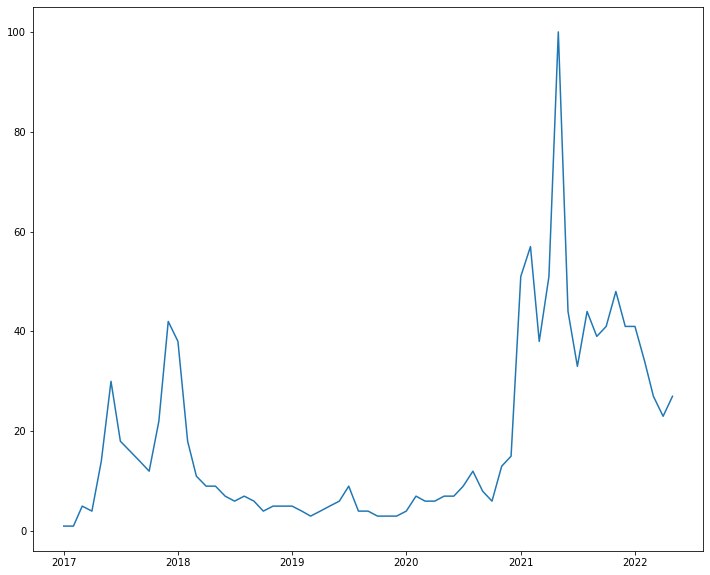

In [318]:
x =googleethereum1['Month']
y = googleethereum1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [387]:
googleethereum1
## This coin has some interesting jumps.  I'm pulling 2 data points to focus on:
## 6-1-17 it jumped up
## 12-1-17 - 1-1-18 another quick jump.  I think this one has to do with bitcoin, because they seem to show a jump during the 1/2018 timeframe.
## 12-1-20 - 5-1-22 it jumped up starting around this time and stayed at a higher rate.  Interesting.

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,1,Ethereum,ETH
1,2017-02-01,1,Ethereum,ETH
2,2017-03-01,5,Ethereum,ETH
3,2017-04-01,4,Ethereum,ETH
4,2017-05-01,14,Ethereum,ETH
5,2017-06-01,30,Ethereum,ETH
6,2017-07-01,18,Ethereum,ETH
7,2017-08-01,16,Ethereum,ETH
8,2017-09-01,14,Ethereum,ETH
9,2017-10-01,12,Ethereum,ETH


In [393]:
slice_listethereum = [5,11,12,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]

googleethereumPeaktable = googleethereum1.iloc[googleethereum1.index.isin(slice_listethereum)]
googleethereumPeaktable

,Month,Trend_Count,CoinName,CoinAbbrev
5,2017-06-01,30,Ethereum,ETH
11,2017-12-01,42,Ethereum,ETH
12,2018-01-01,38,Ethereum,ETH
47,2020-12-01,15,Ethereum,ETH
48,2021-01-01,51,Ethereum,ETH
49,2021-02-01,57,Ethereum,ETH
50,2021-03-01,38,Ethereum,ETH
51,2021-04-01,51,Ethereum,ETH
52,2021-05-01,100,Ethereum,ETH
53,2021-06-01,44,Ethereum,ETH


### Solana

In [236]:
googlesolana = pd.read_csv('../data/2017-2022-solana.csv', skiprows=2)
print(googlesolana.shape)
googlesolana.head(10) 

(65, 2)


,Month,solana: (Worldwide)
0,2017-01,11
1,2017-02,11
2,2017-03,11
3,2017-04,11
4,2017-05,11
5,2017-06,11
6,2017-07,12
7,2017-08,11
8,2017-09,10
9,2017-10,10


In [237]:
googlesolana1 = googlesolana.rename(columns={'solana: (Worldwide)':'Trend_Count'})

In [238]:
googlesolana1['CoinName'] = 'Solana'
googlesolana1['CoinAbbrev'] = 'SOL'

In [319]:
googlesolana1['Month'] = pd.to_datetime(googlesolana1['Month'])
googlesolana1['Trend_Count'] = pd.to_numeric(googlesolana1['Trend_Count'])

In [320]:
googlesolana1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,11,Solana,SOL
1,2017-02-01,11,Solana,SOL
2,2017-03-01,11,Solana,SOL
3,2017-04-01,11,Solana,SOL
4,2017-05-01,11,Solana,SOL
...,...,...,...,...
60,2022-01-01,83,Solana,SOL
61,2022-02-01,65,Solana,SOL
62,2022-03-01,51,Solana,SOL
63,2022-04-01,59,Solana,SOL


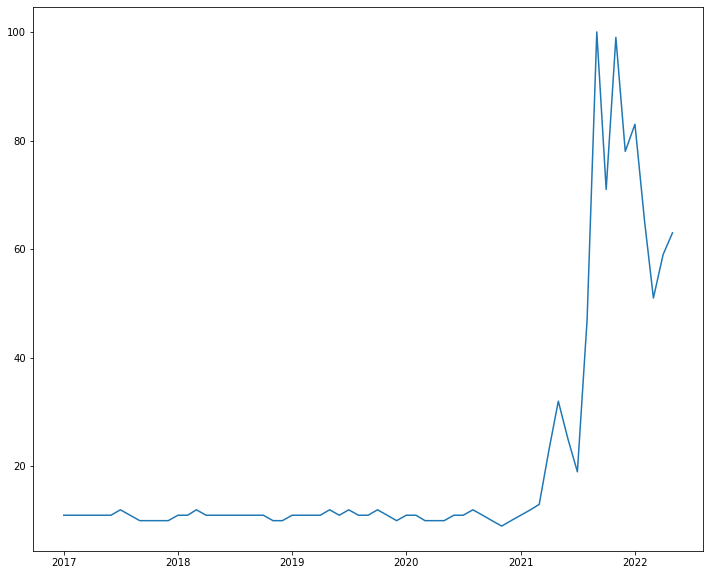

In [321]:
x =googlesolana1['Month']
y = googlesolana1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [389]:
googlesolana1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,11,Solana,SOL
1,2017-02-01,11,Solana,SOL
2,2017-03-01,11,Solana,SOL
3,2017-04-01,11,Solana,SOL
4,2017-05-01,11,Solana,SOL
5,2017-06-01,11,Solana,SOL
6,2017-07-01,12,Solana,SOL
7,2017-08-01,11,Solana,SOL
8,2017-09-01,10,Solana,SOL
9,2017-10-01,10,Solana,SOL


In [392]:
slice_listSolana = [50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]

googleSolanaPeaktable = googlesolana1.iloc[googlesolana1.index.isin(slice_listSolana)]
googleSolanaPeaktable

,Month,Trend_Count,CoinName,CoinAbbrev
50,2021-03-01,13,Solana,SOL
51,2021-04-01,23,Solana,SOL
52,2021-05-01,32,Solana,SOL
53,2021-06-01,25,Solana,SOL
54,2021-07-01,19,Solana,SOL
55,2021-08-01,47,Solana,SOL
56,2021-09-01,100,Solana,SOL
57,2021-10-01,71,Solana,SOL
58,2021-11-01,99,Solana,SOL
59,2021-12-01,78,Solana,SOL


### Stellar

In [240]:
#stellar
googlestellar = pd.read_csv('../data/2017-2022-stellar.csv', skiprows=2)

In [241]:
googlestellar1 = googlestellar.rename(columns={'stellar: (Worldwide)':'Trend_Count'})

In [242]:
googlestellar1['CoinName'] = 'Stellar'
googlestellar1['CoinAbbrev'] = 'XLM'

In [322]:
googlestellar1['Month'] = pd.to_datetime(googlestellar1['Month'])
googlestellar1['Trend_Count'] = pd.to_numeric(googlestellar1['Trend_Count'])

In [391]:
googlestellar1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,23,Stellar,XLM
1,2017-02-01,22,Stellar,XLM
2,2017-03-01,25,Stellar,XLM
3,2017-04-01,28,Stellar,XLM
4,2017-05-01,28,Stellar,XLM
5,2017-06-01,25,Stellar,XLM
6,2017-07-01,22,Stellar,XLM
7,2017-08-01,22,Stellar,XLM
8,2017-09-01,21,Stellar,XLM
9,2017-10-01,27,Stellar,XLM


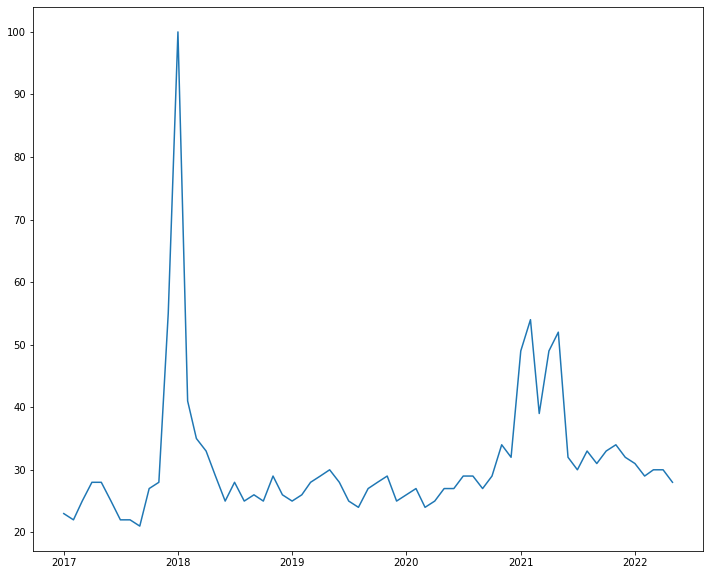

In [373]:
x =googlestellar1['Month']
y = googlestellar1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [396]:
slice_liststellar = [10,11,12,13,14,47,48,49,50,51,52,53,54]

GoogleStellarPeaktable = googlestellar1.iloc[googlestellar1.index.isin(slice_liststellar)]
GoogleStellarPeaktable

,Month,Trend_Count,CoinName,CoinAbbrev
10,2017-11-01,28,Stellar,XLM
11,2017-12-01,55,Stellar,XLM
12,2018-01-01,100,Stellar,XLM
13,2018-02-01,41,Stellar,XLM
14,2018-03-01,35,Stellar,XLM
47,2020-12-01,32,Stellar,XLM
48,2021-01-01,49,Stellar,XLM
49,2021-02-01,54,Stellar,XLM
50,2021-03-01,39,Stellar,XLM
51,2021-04-01,49,Stellar,XLM


### Tether

In [325]:
#tether
googletether = pd.read_csv('../data/2017-2022-tether.csv', skiprows=2)

In [326]:
googletether1 = googletether.rename(columns={'Tether: (Worldwide)':'Trend_Count'})

In [327]:
googletether1['CoinName'] = 'Tether'
googletether1['CoinAbbrev'] = 'USDT'

In [395]:
googletether1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,5,Tether,USDT
1,2017-02-01,5,Tether,USDT
2,2017-03-01,5,Tether,USDT
3,2017-04-01,6,Tether,USDT
4,2017-05-01,6,Tether,USDT
5,2017-06-01,7,Tether,USDT
6,2017-07-01,6,Tether,USDT
7,2017-08-01,6,Tether,USDT
8,2017-09-01,7,Tether,USDT
9,2017-10-01,6,Tether,USDT


In [329]:
googletether1['Month'] = pd.to_datetime(googletether1['Month'])
googletether1['Trend_Count'] = pd.to_numeric(googletether1['Trend_Count'])

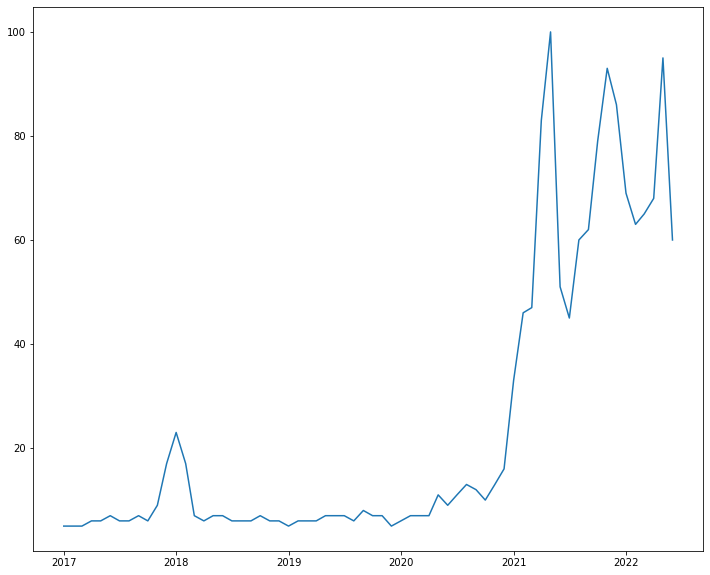

In [330]:
x =googletether1['Month']
y = googletether1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [397]:
slice_listtether = [47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]

GoogleTetherPeaktable = googletether1.iloc[googletether1.index.isin(slice_listtether)]
GoogleTetherPeaktable

,Month,Trend_Count,CoinName,CoinAbbrev
47,2020-12-01,16,Tether,USDT
48,2021-01-01,33,Tether,USDT
49,2021-02-01,46,Tether,USDT
50,2021-03-01,47,Tether,USDT
51,2021-04-01,83,Tether,USDT
52,2021-05-01,100,Tether,USDT
53,2021-06-01,51,Tether,USDT
54,2021-07-01,45,Tether,USDT
55,2021-08-01,60,Tether,USDT
56,2021-09-01,62,Tether,USDT


### XRP

In [335]:

googlexrp = pd.read_csv('../data/2017-2022-XRP.csv', skiprows=2)

In [336]:
googlexrp1 = googlexrp.rename(columns={'XRP: (Worldwide)':'Trend_Count'})

In [337]:
googlexrp1['CoinName'] = 'XRP'
googlexrp1['CoinAbbrev'] = 'XRP'

In [398]:
googlexrp1

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,0,XRP,XRP
1,2017-02-01,0,XRP,XRP
2,2017-03-01,1,XRP,XRP
3,2017-04-01,1,XRP,XRP
4,2017-05-01,5,XRP,XRP
5,2017-06-01,4,XRP,XRP
6,2017-07-01,3,XRP,XRP
7,2017-08-01,5,XRP,XRP
8,2017-09-01,4,XRP,XRP
9,2017-10-01,6,XRP,XRP


In [339]:
googlexrp1['Month'] = pd.to_datetime(googlexrp1['Month'])
googlexrp1['Trend_Count'] = pd.to_numeric(googlexrp1['Trend_Count'])


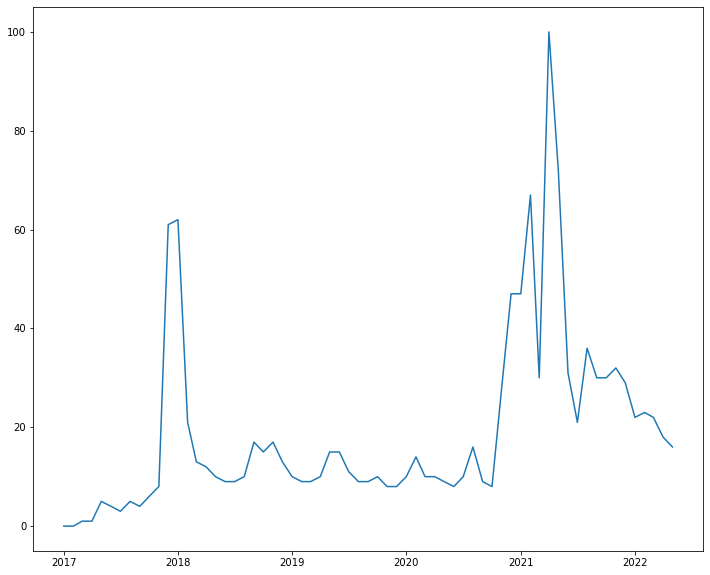

In [340]:
x =googlexrp1['Month']
y = googlexrp1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [401]:
slice_listxrp = [10,11,12,13,14,46,47,48,49,50,51,52,53,54]

GoogleXRPPeaktable = googlexrp1.iloc[googlexrp1.index.isin(slice_listxrp)]
GoogleXRPPeaktable

,Month,Trend_Count,CoinName,CoinAbbrev
10,2017-11-01,8,XRP,XRP
11,2017-12-01,61,XRP,XRP
12,2018-01-01,62,XRP,XRP
13,2018-02-01,21,XRP,XRP
14,2018-03-01,13,XRP,XRP
46,2020-11-01,28,XRP,XRP
47,2020-12-01,47,XRP,XRP
48,2021-01-01,47,XRP,XRP
49,2021-02-01,67,XRP,XRP
50,2021-03-01,30,XRP,XRP


### Cardano

In [341]:
#cardano - Remember, Cardano runs off weekly trend count.  We're going to get the average amount per month for weekly results DFs.
googlecardano = pd.read_csv('../data/2018-2022-cardano.csv', skiprows=2)

In [342]:
googlecardano1 = googlecardano.rename(columns={'cardano: (Worldwide)':'Trend_Count'})

In [343]:
googlecardano1['CoinName'] = 'Cardano'
googlecardano1['CoinAbbrev'] = 'ada'

In [400]:
googlecardano1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-09-23,3,Cardano,ada
1,2018-09-30,3,Cardano,ada
2,2018-10-07,3,Cardano,ada
3,2018-10-14,3,Cardano,ada
4,2018-10-21,3,Cardano,ada
5,2018-10-28,3,Cardano,ada
6,2018-11-04,3,Cardano,ada
7,2018-11-11,3,Cardano,ada
8,2018-11-18,3,Cardano,ada
9,2018-11-25,3,Cardano,ada


In [346]:
googlecardano1['Week'] = pd.to_datetime(googlecardano1['Week'])
googlecardano1['Trend_Count'] = pd.to_numeric(googlecardano1['Trend_Count'])

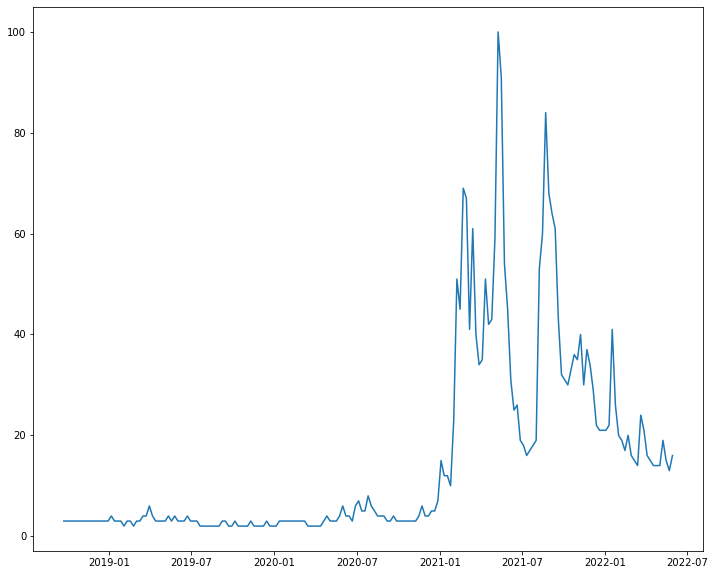

In [348]:
x =googlecardano1['Week']
y = googlecardano1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [403]:
slice_listCardano = list(range(118,156))

GoogleCardanoPeaktable = googlecardano1.iloc[googlecardano1.index.isin(slice_listCardano)]
GoogleCardanoPeaktable

,Week,Trend_Count,CoinName,CoinAbbrev
118,2020-12-27,7,Cardano,ada
119,2021-01-03,15,Cardano,ada
120,2021-01-10,12,Cardano,ada
121,2021-01-17,12,Cardano,ada
122,2021-01-24,10,Cardano,ada
123,2021-01-31,23,Cardano,ada
124,2021-02-07,51,Cardano,ada
125,2021-02-14,45,Cardano,ada
126,2021-02-21,69,Cardano,ada
127,2021-02-28,67,Cardano,ada


### USD Coin

In [349]:
#usd coin - Weekly results.  We're going to need to average this df too.
googleusdcoin = pd.read_csv('../data/2018-2022-usd_coin.csv', skiprows=2)

In [350]:
googleusdcoin1 = googleusdcoin.rename(columns={'USD COIN: (Worldwide)':'Trend_Count'})

In [351]:
googleusdcoin1['CoinName'] = 'USD Coin'
googleusdcoin1['CoinAbbrev'] = 'USDC'

In [352]:
googleusdcoin1['Week'] = pd.to_datetime(googleusdcoin1['Week'])
googleusdcoin1['Trend_Count'] = pd.to_numeric(googleusdcoin1['Trend_Count'])

In [404]:
googleusdcoin1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-10-07,7,USD Coin,USDC
1,2018-10-14,8,USD Coin,USDC
2,2018-10-21,9,USD Coin,USDC
3,2018-10-28,7,USD Coin,USDC
4,2018-11-04,7,USD Coin,USDC
5,2018-11-11,8,USD Coin,USDC
6,2018-11-18,8,USD Coin,USDC
7,2018-11-25,9,USD Coin,USDC
8,2018-12-02,7,USD Coin,USDC
9,2018-12-09,6,USD Coin,USDC


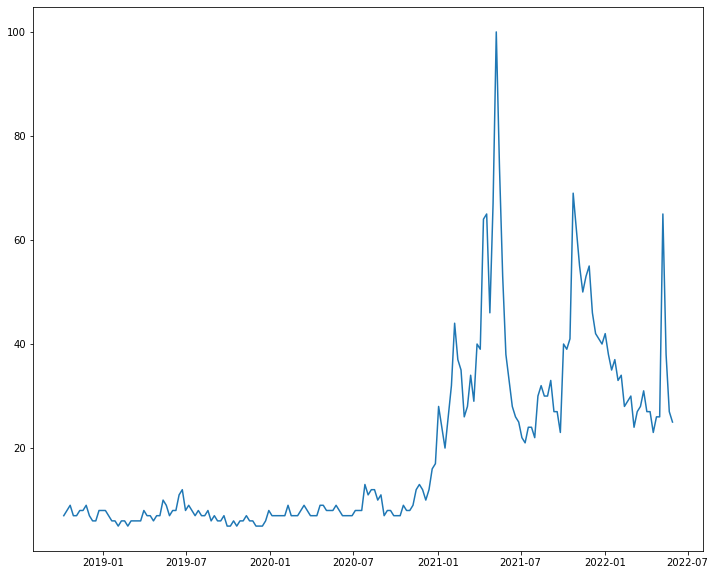

In [354]:
x =googleusdcoin1['Week']
y = googleusdcoin1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [406]:
slice_listUSDCoin = [129,130,131,132,133,134,135,136,137,186,187,188]

GoogleUSDCoinPeaktable = googleusdcoin1.iloc[googleusdcoin1.index.isin(slice_listUSDCoin)]
GoogleUSDCoinPeaktable

,Week,Trend_Count,CoinName,CoinAbbrev
129,2021-03-28,40,USD Coin,USDC
130,2021-04-04,39,USD Coin,USDC
131,2021-04-11,64,USD Coin,USDC
132,2021-04-18,65,USD Coin,USDC
133,2021-04-25,46,USD Coin,USDC
134,2021-05-02,67,USD Coin,USDC
135,2021-05-09,100,USD Coin,USDC
136,2021-05-16,74,USD Coin,USDC
137,2021-05-23,53,USD Coin,USDC
186,2022-05-01,26,USD Coin,USDC


### Shiba Inu

In [355]:
#shiba inu - weekly results
googleshibainu = pd.read_csv('../data/2020-2022-shiba_inu.csv', skiprows=2)

In [356]:
googleshibainu1 = googleshibainu.rename(columns={'Shiba Inu: (Worldwide)':'Trend_Count'})

In [357]:
googleshibainu1['CoinName'] = 'Shiba Inu'
googleshibainu1['CoinAbbrev'] = 'SHIB'

In [358]:
googleshibainu1['Week'] = pd.to_datetime(googleshibainu1['Week'])
googleshibainu1['Trend_Count'] = pd.to_numeric(googleshibainu1['Trend_Count'])

In [407]:
googleshibainu1

,Week,Trend_Count,CoinName,CoinAbbrev
0,2020-08-02,2,Shiba Inu,SHIB
1,2020-08-09,2,Shiba Inu,SHIB
2,2020-08-16,3,Shiba Inu,SHIB
3,2020-08-23,3,Shiba Inu,SHIB
4,2020-08-30,2,Shiba Inu,SHIB
5,2020-09-06,2,Shiba Inu,SHIB
6,2020-09-13,2,Shiba Inu,SHIB
7,2020-09-20,3,Shiba Inu,SHIB
8,2020-09-27,2,Shiba Inu,SHIB
9,2020-10-04,2,Shiba Inu,SHIB


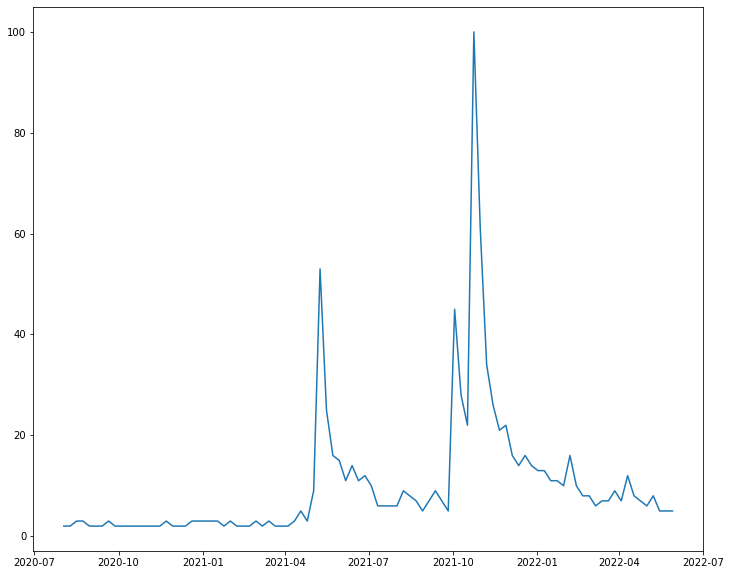

In [360]:
x =googleshibainu1['Week']
y = googleshibainu1['Trend_Count']

plt.figure(figsize=(12,10))
plt.plot(x, y)
plt.show()

In [409]:
slice_listShibaInu = [39,40,41,61,62,63,64,65,66]

GoogleShibaInuPeaktable = googleshibainu1.iloc[googleshibainu1.index.isin(slice_listShibaInu)]
GoogleShibaInuPeaktable

,Week,Trend_Count,CoinName,CoinAbbrev
39,2021-05-02,9,Shiba Inu,SHIB
40,2021-05-09,53,Shiba Inu,SHIB
41,2021-05-16,25,Shiba Inu,SHIB
61,2021-10-03,45,Shiba Inu,SHIB
62,2021-10-10,28,Shiba Inu,SHIB
63,2021-10-17,22,Shiba Inu,SHIB
64,2021-10-24,100,Shiba Inu,SHIB
65,2021-10-31,61,Shiba Inu,SHIB
66,2021-11-07,34,Shiba Inu,SHIB


### I've saved the Google Trend DFs:
googlebitcoin1
googledogecoin1
googleethereum1
googlesolana1
googlestellar1
googletether1
googlexrp1

New DF with all the above combined: MontlyGoogleTrends
IMPORTANT Note:  We're likely not going to be using them merged together.  Visualize them separately here in Python. Price information is where you're going to visualize in PowerBi.

### The DFs below are in a weekly format.  We need to fix this before merging them with the ones above.
googlecardano1
googleusdcoin1
googleshibainu1

New DF with 3 above combined: WeeklyGoogleTrends
IMPORTANT Note:  We're likely not going to be using them merged together.  Visualize them separately here in Python. Price information is where you're going to visualize in PowerBi.

### Tables containing the times the coin word trended the most in the line charts above:

googlebitcoinPeaktable - bitcoin
googledogecoinPeaktable - dogecoin
googleethereumPeaktable - ethereum
googleSolanaPeaktable - solana
GoogleStellarPeaktable - stellar
GoogleTetherPeaktable - Tether
GoogleXRPPeaktable - XRP
GoogleCardanoPeaktable - Cardano
GoogleUSDCoinPeaktable - USD Coin
GoogleShibaInuPeaktable - Shiba Inu



### After reviewing with Teresa, I've agreed that these DFs likely do not need their own combined DFs.  This is likely as far as I'll go with the Google Trend info.  I can visualize the Google Trend Data here.
    ## The data that I'll visualize via PowerBI will be the Coin Amount details.
       Bring in the Coin Details into their own dataframes as well.  Do your analyzing here in Python.  Spend 2-3 days analyzing the data and possibly creating new columns with information you can visualize in PowerBI.  
           One example is you can compare volatility in price.  Volatility in price, trading.  One way to do this would be to find the day's percentage based off what it closed the previous day.
           

In [361]:
## Merging the Month DFs
MontlyGoogleTrends = pd.concat([googlebitcoin1,googledogecoin1,googleethereum1,googlesolana1,googlestellar1,googletether1,googlexrp1])

In [362]:
MontlyGoogleTrends

,Month,Trend_Count,CoinName,CoinAbbrev
0,2017-01-01,6,Bitcoin,BTC
1,2017-02-01,6,Bitcoin,BTC
2,2017-03-01,7,Bitcoin,BTC
3,2017-04-01,6,Bitcoin,BTC
4,2017-05-01,15,Bitcoin,BTC
...,...,...,...,...
60,2022-01-01,22,XRP,XRP
61,2022-02-01,23,XRP,XRP
62,2022-03-01,22,XRP,XRP
63,2022-04-01,18,XRP,XRP


In [363]:
WeeklyGoogleTrends = pd.concat([googlecardano1,googleusdcoin1,googleshibainu1])
WeeklyGoogleTrends

,Week,Trend_Count,CoinName,CoinAbbrev
0,2018-09-23,3,Cardano,ada
1,2018-09-30,3,Cardano,ada
2,2018-10-07,3,Cardano,ada
3,2018-10-14,3,Cardano,ada
4,2018-10-21,3,Cardano,ada
...,...,...,...,...
91,2022-05-01,6,Shiba Inu,SHIB
92,2022-05-08,8,Shiba Inu,SHIB
93,2022-05-15,5,Shiba Inu,SHIB
94,2022-05-22,5,Shiba Inu,SHIB


In [162]:
###Next you need to find a way to get a monthly average for the WeeklyGoogleTrends

### This worked, but I'm going to need to go back and do this to each individual DF with the weekly results FIRST.
### I'm losing the other column names in the process, so I'll need to average the amount THEN add the new columns.
### When I finish doing that, I can move them into the monthly DF.

WeeklyGoogleTrends.groupby(pd.PeriodIndex(WeeklyGoogleTrends['Week'], freq="M"))['Trend Count'].mean()

Week
2018-09     3.000000
2018-10     5.375000
2018-11     5.500000
2018-12     5.000000
2019-01     5.000000
2019-02     4.000000
2019-03     5.200000
2019-04     5.000000
2019-05     5.875000
2019-06     6.300000
2019-07     5.250000
2019-08     4.500000
2019-09     4.300000
2019-10     3.875000
2019-11     4.250000
2019-12     4.000000
2020-01     4.875000
2020-02     5.250000
2020-03     5.100000
2020-04     5.375000
2020-05     6.000000
2020-06     5.625000
2020-07     7.750000
2020-08     6.066667
2020-09     4.333333
2020-10     4.250000
2020-11     5.666667
2020-12     7.166667
2021-01    14.400000
2021-02    31.916667
2021-03    26.333333
2021-04    33.166667
2021-05    53.266667
2021-06    21.750000
2021-07    15.666667
2021-08    30.866667
2021-09    28.166667
2021-10    44.800000
2021-11    38.083333
2021-12    26.833333
2022-01    24.866667
2022-02    19.583333
2022-03    17.750000
2022-04    16.333333
2022-05    19.133333
Freq: M, Name: Trend Count, dtype: float64

### Maybe we can get something to actually correlate when the coin was actually popping up in popularity.  I know Teresa said we cant really compare the two, but it's interesting to see that there was a peak in 2018 not just for bitcoin but for other coins.

### Adding in each CryptoCoin CSV into their own DF.

BitcoinPrice
DogecoinPrice
EthereumPrice
SolanaPrice
StellarPrice
TetherPrice
XRPPrice
CardanoPrice
USDCoinPrice
ShibaInuPrice

### Bitcoin Price by date

In [462]:
BitcoinPrice = pd.read_csv('../data/BTC-USD.csv')
print(BitcoinPrice.shape)
BitcoinPrice.head(10) 

(1976, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008.0
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0
5,2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000.0
6,2017-01-07,903.487000,908.585022,823.556030,908.585022,908.585022,279550016.0
7,2017-01-08,908.174988,942.723999,887.249023,911.198975,911.198975,158715008.0
8,2017-01-09,913.244019,913.685974,879.807007,902.828003,902.828003,141876992.0
9,2017-01-10,902.440002,914.872986,901.059998,907.679016,907.679016,115808000.0


In [463]:
BitcoinPrice = pd.DataFrame(BitcoinPrice)

In [464]:
BitcoinPrice['Date'] = pd.to_datetime(BitcoinPrice['Date'])

In [465]:
BitcoinPrice['% Change'] = BitcoinPrice['Close'].pct_change()
BitcoinPrice['Volume % Change'] = BitcoinPrice['Volume'].pct_change()

### Dogecoin Price by date

In [449]:
DogecoinPrice = pd.read_csv('../data/DOGE-USD.csv')
DogecoinPrice = pd.DataFrame(DogecoinPrice)
DogecoinPrice['Date'] = pd.to_datetime(DogecoinPrice['Date'])

In [466]:
DogecoinPrice['% Change'] = DogecoinPrice['Close'].pct_change()
DogecoinPrice['Volume % Change'] = DogecoinPrice['Volume'].pct_change()

### Ethereum Price by date

In [470]:
EthereumPrice = pd.read_csv('../data/ETH-USD.csv')
EthereumPrice = pd.DataFrame(EthereumPrice)
EthereumPrice['Date'] = pd.to_datetime(EthereumPrice['Date'])

In [471]:
EthereumPrice['% Change'] = EthereumPrice['Close'].pct_change()
EthereumPrice['Volume % Change'] = EthereumPrice['Volume'].pct_change()

### Solana Price by date

In [472]:
SolanaPrice = pd.read_csv('../data/SOL-USD.csv')
SolanaPrice = pd.DataFrame(SolanaPrice)
SolanaPrice['Date'] = pd.to_datetime(SolanaPrice['Date'])

In [473]:
SolanaPrice['% Change'] = SolanaPrice['Close'].pct_change()
SolanaPrice['Volume % Change'] = SolanaPrice['Volume'].pct_change()

### Stellar Price by date

In [474]:
StellarPrice = pd.read_csv('../data/XLM-USD.csv')
StellarPrice = pd.DataFrame(StellarPrice)
StellarPrice['Date'] = pd.to_datetime(StellarPrice['Date'])

In [475]:
StellarPrice['% Change'] = StellarPrice['Close'].pct_change()
StellarPrice['Volume % Change'] = StellarPrice['Volume'].pct_change()

### Tether Price by date

In [476]:
TetherPrice = pd.read_csv('../data/USDT-USD.csv')
TetherPrice = pd.DataFrame(TetherPrice)
TetherPrice['Date'] = pd.to_datetime(TetherPrice['Date'])

In [477]:
TetherPrice['% Change'] = TetherPrice['Close'].pct_change()
TetherPrice['Volume % Change'] = TetherPrice['Volume'].pct_change()

### XRP Price by date

In [479]:
XRPPrice = pd.read_csv('../data/XRP-USD.csv')
XRPPrice = pd.DataFrame(XRPPrice)
XRPPrice['Date'] = pd.to_datetime(XRPPrice['Date'])

In [480]:
XRPPrice['% Change'] = XRPPrice['Close'].pct_change()
XRPPrice['Volume % Change'] = XRPPrice['Volume'].pct_change()

### Cardano Price by date

In [481]:
CardanoPrice = pd.read_csv('../data/ADA-USD.csv')
CardanoPrice = pd.DataFrame(CardanoPrice)
CardanoPrice['Date'] = pd.to_datetime(CardanoPrice['Date'])

In [482]:
CardanoPrice['% Change'] = CardanoPrice['Close'].pct_change()
CardanoPrice['Volume % Change'] = CardanoPrice['Volume'].pct_change()

### USD Coin Price by date

In [483]:
USDCoinPrice = pd.read_csv('../data/USDC-USD.csv')
USDCoinPrice = pd.DataFrame(USDCoinPrice)
USDCoinPrice['Date'] = pd.to_datetime(USDCoinPrice['Date'])

In [484]:
USDCoinPrice['% Change'] = USDCoinPrice['Close'].pct_change()
USDCoinPrice['Volume % Change'] = USDCoinPrice['Volume'].pct_change()

### Shiba Inu Price by date

In [485]:
ShibaInuPrice = pd.read_csv('../data/SHIB-USD.csv')
ShibaInuPrice = pd.DataFrame(ShibaInuPrice)
ShibaInuPrice['Date'] = pd.to_datetime(ShibaInuPrice['Date'])

In [486]:
ShibaInuPrice['% Change'] = ShibaInuPrice['Close'].pct_change()
ShibaInuPrice['Volume % Change'] = ShibaInuPrice['Volume'].pct_change()

### Need to create an iterable to calculate the percentage change from the previous date on the coin price.
### Done!  Didn't need to do that.  I did used the pct.change function to calculate the difference!
### I also added the volume percentage change.  Volume is how many times a coin changes hands over a given time.

Research on price–volume relationships started in 1966 when Ying (1966) proved an asymmetric relationship between the absolute value of a daily price change and daily volume, which stated that strong volume increases are associated with either strong price decreases or increases.  https://www.jstor.org/stable/1909776

### I'm saving these new DFs with their added columns to new CSVs.  I think it's time to use the information I put together here and move it over to PowerBI for further analysis.  I might still need to come back to review additional information..

In [ ]:
## googlebitcoin.to_csv(r'../data/testing.csv'